In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
df = pd.read_csv('data/us_data.csv')
df

,...1,name_patient,id_patient,date_examination,group_separation,age_patient,diagnosis_primary,side,satus_reproductive,complaints,...,mmg_is_tumor,abus_is_tumor,hist_is_tumor,us_probabilityCalc,us_probabilityMicroCalc,abus_probabilityCalc,abus_probabilityMicroCalc,us_probabilityNeoCa,abus_probabilityNeoCa,mmg_probabilityNeoCa
0,1,2263,EMC232829,01 11 2022,старше 40 лет,51,Диффузный фиброаденоматоз,не пальпируются,менопауза до 5 лет,нет,...,Нет,Нет,Нет,0.074691,0.983994,0.085571,0.981285,0.012134,0.036525,0.066180
1,2,921,EMC4164053,02 12 2022,до 40 лет,34,Без патологии,не пальпируются,репродуктивный возраст,нет,...,Нет,Нет,Нет,0.015111,0.995484,0.016737,0.995968,0.007380,0.013590,0.035624
2,3,644,EMC395750,29 11 2022,до 40 лет,33,Фиброаденома,левая,репродуктивный возраст,уплотнение,...,Нет,Нет,Нет,0.013724,0.995809,0.015164,0.996319,0.007166,0.012814,0.034330
3,4,748,EMC4447809,17 04 2023,до 40 лет,35,Диффузный фиброаденоматоз,не пальпируются,пременопауза,нет,...,Нет,Да,Да,0.320733,0.948342,0.429658,0.883280,0.717905,0.824049,0.036964
4,5,337,EMC4359772,25 10 2022,старше 40 лет,40,Диффузный фиброаденоматоз,не пальпируются,репродуктивный возраст,нет,...,Нет,Нет,Нет,0.026828,0.992930,0.030127,0.993053,0.008798,0.019313,0.044425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,2790,105,EMC326626,14 02 2023,до 40 лет,34,Фиброзно-кистозная болезнь,не пальпируются,репродуктивный возраст,нет,...,Нет,Нет,Нет,0.015111,0.995484,0.016737,0.995968,0.007380,0.013590,0.035624
2790,2791,707,EMC4308341,03 12 2022,до 40 лет,33,Диффузный фиброаденоматоз,не пальпируются,репродуктивный возраст,нет,...,Нет,Нет,Нет,0.013724,0.995809,0.015164,0.996319,0.007166,0.012814,0.034330
2791,2792,1248,EMC4508062,05 11 2022,до 40 лет,31,Фиброаденома,обе,репродуктивный возраст,нет,...,Нет,Нет,Нет,0.011316,0.996391,0.012444,0.996930,0.006758,0.011392,0.031878
2792,2793,2119,EMC4502663,24 01 2023,старше 40 лет,56,Локализованный фиброаденоматоз,обе,менопауза до 5 лет,нет,...,Нет,Нет,Да,0.116250,0.976867,0.133810,0.970790,0.014037,0.048576,0.079054


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ...1                              2794 non-null   int64  
 1   name_patient                      2794 non-null   int64  
 2   id_patient                        2794 non-null   object 
 3   date_examination                  2794 non-null   object 
 4   group_separation                  2794 non-null   object 
 5   age_patient                       2794 non-null   int64  
 6   diagnosis_primary                 2794 non-null   object 
 7   side                              2794 non-null   object 
 8   satus_reproductive                2794 non-null   object 
 9   complaints                        2794 non-null   object 
 10  breast_surgery_before             2794 non-null   object 
 11  skin_symptoms                     2794 non-null   object 
 12  nipple

### Работа до 40 лет

In [68]:
df_us = df[['age_patient',
            'diagnosis_primary',
            'side',
            'satus_reproductive',
            'complaints',
            'breast_surgery_before', 
            'skin_symptoms',
            'nipple_retraction', 
            'nipple_release',
            'quadrant', 
            'genetics',
            'hormonal_medications',
            'hist_is_tumor']]
df_us_jn = df_us[df_us['age_patient'] < 40]

In [ ]:
df_us_jn["diagnosis_primary"] = df_us_jn['diagnosis_primary'].apply(lambda x: 1 if x == df_us_jn["diagnosis_primary"].unique()[0]
                                    else 2 if x == df_us_jn["diagnosis_primary"].unique()[1]
                                    else 3 if x == df_us_jn["diagnosis_primary"].unique()[2]
                                    else 4 if x == df_us_jn["diagnosis_primary"].unique()[3]
                                    else 5 if x == df_us_jn["diagnosis_primary"].unique()[4]
                                    else 6 if x == df_us_jn["diagnosis_primary"].unique()[5]
                                    else 7 if x == df_us_jn["diagnosis_primary"].unique()[6]
                                    else 8 if x == df_us_jn["diagnosis_primary"].unique()[7]
                                    else 9 if x == df_us_jn["diagnosis_primary"].unique()[8]                                    
                                    else 10)
df_us_jn["satus_reproductive"] = df_us_jn["satus_reproductive"].apply(lambda x: 1 if x == df_us_jn["diagnosis_primary"].unique()[0]
                                    else 2)
df_us_jn["side"] = df_us_jn['side'].apply(lambda x: 1 if x == df_us_jn["side"].unique()[0]
                                    else 2 if x == df_us_jn["side"].unique()[1]
                                    else 3 if x == df_us_jn["side"].unique()[2]
                                    else 4)
df_us_jn["complaints"] = df_us_jn['complaints'].apply(lambda x: 1 if x == df_us_jn["complaints"].unique()[0]
                                    else 2 if x == df_us_jn["complaints"].unique()[1]
                                    else 3 if x == df_us_jn["complaints"].unique()[2]
                                    else 4)
df_us_jn["breast_surgery_before"] = df_us_jn["breast_surgery_before"].apply(lambda x: 1 if x == df_us_jn["breast_surgery_before"].unique()[0]
                                    else 2)
df_us_jn["skin_symptoms"] = df_us_jn["skin_symptoms"].apply(lambda x: 1 if x == df_us_jn["skin_symptoms"].unique()[0]
                                    else 2)
df_us_jn["nipple_retraction"] = df_us_jn["nipple_retraction"].apply(lambda x: 1 if x == df_us_jn["nipple_retraction"].unique()[0]
                                    else 2)
df_us_jn["nipple_release"] = df_us_jn["nipple_release"].apply(lambda x: 1 if x == df_us_jn["nipple_release"].unique()[0]
                                    else 2)
df_us_jn["quadrant"] = df_us_jn['quadrant'].apply(lambda x: 1 if x == df_us_jn["quadrant"].unique()[0]
                                    else 2 if x == df_us_jn["quadrant"].unique()[1]
                                    else 3 if x == df_us_jn["quadrant"].unique()[2]
                                    else 4 if x == df_us_jn["quadrant"].unique()[3]
                                    else 5 if x == df_us_jn["quadrant"].unique()[4]
                                    else 6 if x == df_us_jn["quadrant"].unique()[5]
                                    else 7 if x == df_us_jn["quadrant"].unique()[6]
                                    else 8 if x == df_us_jn["quadrant"].unique()[7]
                                    else 9 if x == df_us_jn["quadrant"].unique()[8]                                    
                                    else 10)
df_us_jn["genetics"] = df_us_jn["genetics"].apply(lambda x: 1 if x == df_us_jn["genetics"].unique()[0]
                                    else 2)
df_us_jn["hormonal_medications"] = df_us_jn["hormonal_medications"].apply(lambda x: 1 if x == df_us_jn["hormonal_medications"].unique()[0]
                                    else 2)
df_us_jn["hist_is_tumor"] = df_us_jn["hist_is_tumor"].apply(lambda x: 1 if x == df_us_jn["hist_is_tumor"].unique()[0]
                                    else 2)

/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_33352/4024910478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_jn["diagnosis_primary"] = df_us_jn['diagnosis_primary'].apply(lambda x: 1 if x == df_us_jn["diagnosis_primary"].unique()[0]
/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_33352/4024910478.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_jn["satus_reproductive"] = df_us_jn["satus_reproductive"].apply(lambda x: 1 if x == df_us_jn["diagnosis_primary"].uniqu

In [70]:
X = df_us_jn.drop('hist_is_tumor', axis=1)
y = df_us_jn['hist_is_tumor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

 

In [71]:


rf = RandomForestClassifier(
    n_estimators=500, 
    max_depth=5, 
    max_features=None, 
    bootstrap=True, 
    min_samples_split=5,
    min_samples_leaf=2, 
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)

In [72]:

rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finis

In [73]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.986
fr test accuracy 0.987


In [74]:
rf.feature_importances_

array([0.16170152, 0.47541173, 0.0368214 , 0.        , 0.01817039,
       0.08133098, 0.        , 0.19109777, 0.        , 0.01911174,
       0.0084541 , 0.00790036])

In [75]:
rf2 = RandomForestClassifier(
    n_estimators=500, 
    max_depth=3, 
    max_features=3, 
    bootstrap=True, 
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)

In [76]:
rf2.fit(X_train, y_train)
y_pred_train = rf2.predict(X_train)
y_pred_test = rf2.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finis

In [20]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.969
fr test accuracy 0.967


In [79]:
cv_scores = cross_val_score(rf2, X, y, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks     

[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks 

[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


In [80]:
cv_scores

array([0.96710526, 0.97350993, 0.98013245, 0.96688742, 0.96688742,
       0.96688742, 0.98013245, 0.96688742, 0.9602649 , 0.9602649 ])

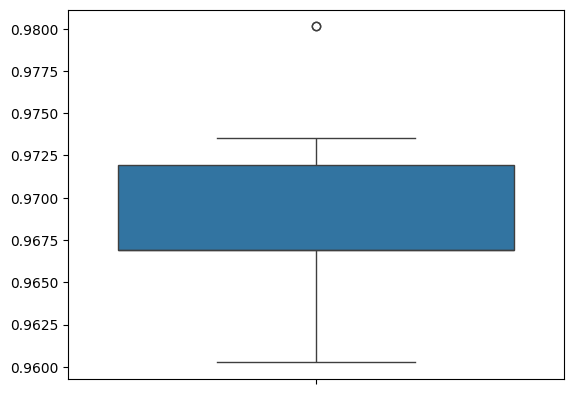

In [81]:
sns.boxplot(cv_scores)
plt.show()

In [82]:
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [2, 3, 4]
}

rf3 = RandomForestClassifier(n_estimators=500, random_state=42)

grid_search = GridSearchCV(estimator=rf3,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [84]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [85]:
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [86]:
print(grid_search.best_score_)

0.9817873186790577


In [145]:
df_us = df[['age_patient',
            'diagnosis_primary',
            'side',
            'satus_reproductive',
            'complaints',
            'breast_surgery_before', 
            'skin_symptoms',
            'nipple_retraction', 
            'nipple_release',
            'quadrant', 
            'genetics',
            'hormonal_medications',
            'mmg_conclusion_skin',
            'mmg_areola',
            'mmg_nipple',
            'mmg_background_breast',
            'mmg_nodle',
            'mmg_nodle_contour',
            'mmg_nodle_size',
            'mmg_calcifications',
            'mmg_number_formations_visualized',
            'mmg_axillary_lymph_nodes',
            'mmg_conclusion',
            'type_structure_acr',
            'mmg_number_nodles',
            'mmg_category_birads',
            'hist_is_tumor']]
df_us_snr = df_us[df_us['age_patient'] >= 40]
df_us_snr

,age_patient,diagnosis_primary,side,satus_reproductive,complaints,breast_surgery_before,skin_symptoms,nipple_retraction,nipple_release,quadrant,...,mmg_nodle_contour,mmg_nodle_size,mmg_calcifications,mmg_number_formations_visualized,mmg_axillary_lymph_nodes,mmg_conclusion,type_structure_acr,mmg_number_nodles,mmg_category_birads,hist_is_tumor
0,51,Диффузный фиброаденоматоз,не пальпируются,менопауза до 5 лет,нет,не было операций,нет,нет,нет,нет,...,нет,нет,сгруппированные,не определяется,не визуализируются,дифузный фиброаденоматоз,С,не определяется,Birads 2,Нет
4,40,Диффузный фиброаденоматоз,не пальпируются,репродуктивный возраст,нет,не было операций,нет,нет,нет,нет,...,нет,нет,нет,не определяется,не визуализируются,дифузный фиброаденоматоз,С,не определяется,Birads 2,Нет
6,50,Диффузный фиброаденоматоз,не пальпируются,пременопауза,нет,не было операций,нет,нет,нет,нет,...,нет,нет,нет,не определяется,не визуализируются,дифузный фиброаденоматоз,С,не определяется,Birads 2,Нет
8,47,Фиброзно-кистозная болезнь,не пальпируются,пременопауза,уплотнение,не было операций,нет,нет,нет,нет,...,нет,нет,нет,не определяется,не увеличены,дифузный фиброаденоматоз,С,не определяется,Birads 1,Нет
9,49,Фиброзно-кистозная болезнь,не пальпируются,менопауза до 5 лет,нет,не было операций,нет,нет,нет,нет,...,нет,нет,нет,не определяется,не визуализируются,дифузный фиброаденоматоз,С,не определяется,Birads 2,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,45,Без патологии,не пальпируются,пременопауза,нет,не было операций,нет,да,нет,нет,...,нет,"1,5-2,0 см",сгруппированные,не определяется,не визуализируются,Susp Ca,С,один,Birads 5,Нет
2785,47,Рак,левая,репродуктивный возраст,уплотнение,не было операций,гиперемия,нет,нет,верхне-внутренний,...,нечеткий,"1,5-2,0 см",единичные мелкие,одно,метастатически изменены,Susp Ca,D,один,Birads 4c,Да
2787,48,Фиброаденома,правая,пременопауза,нет,не было операций,нет,нет,нет,граница наружного,...,четкий,"0,5-1,0 см",нет,одно,не визуализируются,фиброаденома,С,один,Birads 2,Нет
2792,56,Локализованный фиброаденоматоз,обе,менопауза до 5 лет,нет,не было операций,нет,нет,нет,верхне-наружный,...,нечеткий,"2,5-3,0 см",единичные мелкие,участок асимметрии,не визуализируются,локализованный фиброаденоматоз,С,два,Birads 2,Да


In [146]:
df_us_snr["diagnosis_primary"] = df_us_snr['diagnosis_primary'].apply(lambda x: 1 if x == df_us_snr["diagnosis_primary"].unique()[0]
                                    else 2 if x == df_us_snr["diagnosis_primary"].unique()[1]
                                    else 3 if x == df_us_snr["diagnosis_primary"].unique()[2]
                                    else 4 if x == df_us_snr["diagnosis_primary"].unique()[3]
                                    else 5 if x == df_us_snr["diagnosis_primary"].unique()[4]
                                    else 6 if x == df_us_snr["diagnosis_primary"].unique()[5]
                                    else 7 if x == df_us_snr["diagnosis_primary"].unique()[6]
                                    else 8 if x == df_us_snr["diagnosis_primary"].unique()[7]
                                    else 9 if x == df_us_snr["diagnosis_primary"].unique()[8]                                    
                                    else 10)
df_us_snr["satus_reproductive"] = df_us_snr["satus_reproductive"].apply(lambda x: 1 if x == df_us_snr["diagnosis_primary"].unique()[0]
                                    else 2)
df_us_snr["side"] = df_us_snr['side'].apply(lambda x: 1 if x == df_us_snr["side"].unique()[0]
                                    else 2 if x == df_us_snr["side"].unique()[1]
                                    else 3 if x == df_us_snr["side"].unique()[2]
                                    else 4)
df_us_snr["complaints"] = df_us_snr['complaints'].apply(lambda x: 1 if x == df_us_snr["complaints"].unique()[0]
                                    else 2 if x == df_us_snr["complaints"].unique()[1]
                                    else 3 if x == df_us_snr["complaints"].unique()[2]
                                    else 4)
df_us_snr["breast_surgery_before"] = df_us_snr["breast_surgery_before"].apply(lambda x: 1 if x == df_us_snr["breast_surgery_before"].unique()[0]
                                    else 2)
df_us_snr["skin_symptoms"] = df_us_snr["skin_symptoms"].apply(lambda x: 1 if x == df_us_snr["skin_symptoms"].unique()[0]
                                    else 2)
df_us_snr["nipple_retraction"] = df_us_snr["nipple_retraction"].apply(lambda x: 1 if x == df_us_snr["nipple_retraction"].unique()[0]
                                    else 2)
df_us_snr["nipple_release"] = df_us_snr["nipple_release"].apply(lambda x: 1 if x == df_us_snr["nipple_release"].unique()[0]
                                    else 2)
df_us_snr["quadrant"] = df_us_snr['quadrant'].apply(lambda x: 1 if x == df_us_snr["quadrant"].unique()[0]
                                    else 2 if x == df_us_snr["quadrant"].unique()[1]
                                    else 3 if x == df_us_snr["quadrant"].unique()[2]
                                    else 4 if x == df_us_snr["quadrant"].unique()[3]
                                    else 5 if x == df_us_snr["quadrant"].unique()[4]
                                    else 6 if x == df_us_snr["quadrant"].unique()[5]
                                    else 7 if x == df_us_snr["quadrant"].unique()[6]
                                    else 8 if x == df_us_snr["quadrant"].unique()[7]
                                    else 9 if x == df_us_snr["quadrant"].unique()[8]                                    
                                    else 10)
df_us_snr["genetics"] = df_us_snr["genetics"].apply(lambda x: 1 if x == df_us_snr["genetics"].unique()[0]
                                    else 2)
df_us_snr["hormonal_medications"] = df_us_snr["hormonal_medications"].apply(lambda x: 1 if x == df_us_snr["hormonal_medications"].unique()[0]
                                    else 2)
df_us_snr["hist_is_tumor"] = df_us_snr["hist_is_tumor"].apply(lambda x: 1 if x == df_us_snr["hist_is_tumor"].unique()[0]
                                    else 2)
df_us_snr["mmg_conclusion_skin"] = df_us_snr['mmg_conclusion_skin'].apply(lambda x: 1 if x == df_us_snr["mmg_conclusion_skin"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_conclusion_skin"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_conclusion_skin"].unique()[2]
                                    else 4)
df_us_snr["mmg_areola"] = df_us_snr['mmg_areola'].apply(lambda x: 1 if x == df_us_snr["mmg_areola"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_areola"].unique()[1]
                                    else 3)
df_us_snr["mmg_nipple"] = df_us_snr['mmg_nipple'].apply(lambda x: 1 if x == df_us_snr["mmg_nipple"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_nipple"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_nipple"].unique()[2]
                                    else 4)
df_us_snr["mmg_background_breast"] = df_us_snr['mmg_background_breast'].apply(lambda x: 1 if x == df_us_snr["mmg_background_breast"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_background_breast"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_background_breast"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_background_breast"].unique()[3]
                                    else 5)
df_us_snr["mmg_nodle"] = df_us_snr['mmg_nodle'].apply(lambda x: 1 if x == df_us_snr["mmg_nodle"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_nodle"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_nodle"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_nodle"].unique()[3]
                                    else 5 if x == df_us_snr["mmg_nodle"].unique()[4]
                                    else 6 if x == df_us_snr["mmg_nodle"].unique()[5]
                                    else 7 if x == df_us_snr["mmg_nodle"].unique()[6]
                                    else 8 if x == df_us_snr["mmg_nodle"].unique()[7]
                                    else 9 if x == df_us_snr["mmg_nodle"].unique()[8]                                    
                                    else 10)
df_us_snr["mmg_nodle_contour"] = df_us_snr['mmg_nodle_contour'].apply(lambda x: 1 if x == df_us_snr["mmg_nodle_contour"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_nodle_contour"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_nodle_contour"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_nodle_contour"].unique()[3]
                                    else 5)
df_us_snr["mmg_nodle_size"] = df_us_snr['mmg_nodle_size'].apply(lambda x: 1 if x == df_us_snr["mmg_nodle_size"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_nodle_size"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_nodle_size"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_nodle_size"].unique()[3]
                                    else 5 if x == df_us_snr["mmg_nodle_size"].unique()[4]
                                    else 6 if x == df_us_snr["mmg_nodle_size"].unique()[5]
                                    else 7)
df_us_snr["mmg_calcifications"] = df_us_snr['mmg_calcifications'].apply(lambda x: 1 if x == df_us_snr["mmg_calcifications"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_calcifications"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_calcifications"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_calcifications"].unique()[3]
                                    else 5 if x == df_us_snr["mmg_calcifications"].unique()[4]
                                    else 6 if x == df_us_snr["mmg_calcifications"].unique()[5]
                                    else 7 if x == df_us_snr["mmg_calcifications"].unique()[6]
                                    else 8 if x == df_us_snr["mmg_calcifications"].unique()[7]
                                    else 9 if x == df_us_snr["mmg_calcifications"].unique()[8]                                    
                                    else 10 if x == df_us_snr["mmg_calcifications"].unique()[9]
                                    else 11)
df_us_snr["mmg_number_formations_visualized"] = df_us_snr['mmg_number_formations_visualized'].apply(lambda x: 1 if x == df_us_snr["mmg_number_formations_visualized"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_number_formations_visualized"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_number_formations_visualized"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_number_formations_visualized"].unique()[3]
                                    else 5)
df_us_snr["mmg_axillary_lymph_nodes"] = df_us_snr['mmg_axillary_lymph_nodes'].apply(lambda x: 1 if x == df_us_snr["mmg_axillary_lymph_nodes"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_axillary_lymph_nodes"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_axillary_lymph_nodes"].unique()[2]
                                    else 4)
df_us_snr["mmg_conclusion"] = df_us_snr['mmg_conclusion'].apply(lambda x: 1 if x == df_us_snr["mmg_conclusion"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_conclusion"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_conclusion"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_conclusion"].unique()[3]
                                    else 5 if x == df_us_snr["mmg_conclusion"].unique()[4]
                                    else 6 if x == df_us_snr["mmg_conclusion"].unique()[5]
                                    else 7 if x == df_us_snr["mmg_conclusion"].unique()[6]
                                    else 8 if x == df_us_snr["mmg_conclusion"].unique()[7]
                                    else 9)
df_us_snr["type_structure_acr"] = df_us_snr['type_structure_acr'].apply(lambda x: 1 if x == df_us_snr["type_structure_acr"].unique()[0]
                                    else 2)
df_us_snr["mmg_number_nodles"] = df_us_snr['mmg_number_nodles'].apply(lambda x: 1 if x == df_us_snr["mmg_number_nodles"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_number_nodles"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_number_nodles"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_number_nodles"].unique()[3]
                                    else 5)
df_us_snr["mmg_category_birads"] = df_us_snr['mmg_category_birads'].apply(lambda x: 1 if x == df_us_snr["mmg_category_birads"].unique()[0]
                                    else 2 if x == df_us_snr["mmg_category_birads"].unique()[1]
                                    else 3 if x == df_us_snr["mmg_category_birads"].unique()[2]
                                    else 4 if x == df_us_snr["mmg_category_birads"].unique()[3]
                                    else 5 if x == df_us_snr["mmg_category_birads"].unique()[4]
                                    else 6 if x == df_us_snr["mmg_category_birads"].unique()[5]
                                    else 7 if x == df_us_snr["mmg_category_birads"].unique()[6]
                                    else 8 if x == df_us_snr["mmg_category_birads"].unique()[7]
                                    else 9)

/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_33352/2032572220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_snr["diagnosis_primary"] = df_us_snr['diagnosis_primary'].apply(lambda x: 1 if x == df_us_snr["diagnosis_primary"].unique()[0]
/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_33352/2032572220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_snr["satus_reproductive"] = df_us_snr["satus_reproductive"].apply(lambda x: 1 if x == df_us_snr["diagnosis_primary"]

In [148]:
df_us_snr["mmg_nodle_contour"].value_counts()

mmg_nodle_contour
1    1085
2     104
3      69
4      17
5       8
Name: count, dtype: int64

In [149]:
X = df_us_snr.drop('hist_is_tumor', axis=1)
y = df_us_snr['hist_is_tumor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [150]:
rf = RandomForestClassifier(
    n_estimators=500, 
    max_depth=5, 
    max_features=None, 
    bootstrap=True, 
    min_samples_split=5,
    min_samples_leaf=2, 
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)

In [151]:
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finis

In [152]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.983
fr test accuracy 0.984


In [153]:
cv_scores = cross_val_score(rf2, X, y, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 

[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.4s

[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


In [154]:
cv_scores

array([0.96899225, 0.97674419, 0.94573643, 0.921875  , 0.9765625 ,
       0.953125  , 0.9453125 , 0.953125  , 0.953125  , 0.9453125 ])

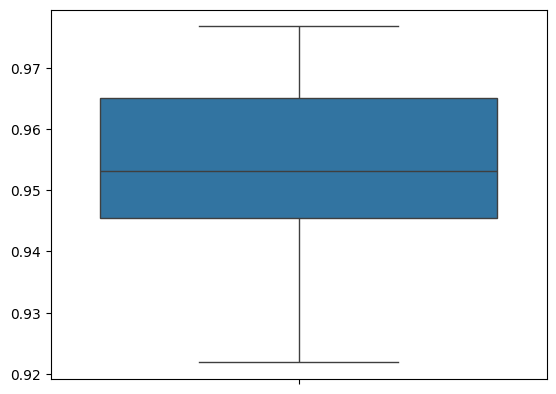

In [155]:
sns.boxplot(cv_scores)
plt.show()

In [156]:
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [2, 3, 4]
}

rf3 = RandomForestClassifier(n_estimators=500, random_state=42)

grid_search = GridSearchCV(estimator=rf3,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [157]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [158]:
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [159]:
print(grid_search.best_score_)

0.9620033151787828
